# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats 
#import linregress
import json

# Import API key
from api_keys import weather_api_key

from api_keys import g_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [92]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #1500
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) #1500
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities[0])

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [93]:
#"http://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}"
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
#{city name}&appid={API key}
resp_city_json=[]

# set up lists to hold reponse info
latList = []
lngList= []
cityList=[]
MaxTempList=[]
HumidityList=[]
CloudinessList =[]
WindspeedList = []
CountryList=[]
DateList=[]


i=1
listcnt=0
setnum=1
for city in cities:
    try:
        
        resp_city = requests.get(base_url+city+"&appid="+weather_api_key+"&units=imperial").json()
#     print("Processing City" + str(i) + ": Cityname: "+city)
#&units=imperial
        resp_city_json.append(resp_city)
        latList.append(resp_city['coord']['lat'])
        lngList.append(resp_city['coord']['lon'])
        cityList.append(resp_city['name'])
        MaxTempList.append(resp_city['main']['temp_max'])
        HumidityList.append(resp_city['main']['humidity'])
        CloudinessList.append(resp_city['clouds']['all'])
        WindspeedList.append(resp_city['wind']['speed'])
        CountryList.append(resp_city['sys']['country'])
        DateList.append(resp_city['dt'])
#     resp_city_json
        i=i+1
        if listcnt > 49:
            listcnt=1
            setnum = setnum + 1
            resp_city_json.append(resp_city)
        else:
            listcnt=listcnt +1
            resp_city_json.append(resp_city)
        print(f"Processing Record  {listcnt} of Set {setnum} ")
      
    except Exception:
          print("City not found. Skipping...")    
    



Processing Record  1 of Set 1 
Processing Record  2 of Set 1 
Processing Record  3 of Set 1 
Processing Record  4 of Set 1 
Processing Record  5 of Set 1 
Processing Record  6 of Set 1 
Processing Record  7 of Set 1 
Processing Record  8 of Set 1 
Processing Record  9 of Set 1 
Processing Record  10 of Set 1 
Processing Record  11 of Set 1 
Processing Record  12 of Set 1 
City not found. Skipping...
Processing Record  13 of Set 1 
Processing Record  14 of Set 1 
Processing Record  15 of Set 1 
Processing Record  16 of Set 1 
Processing Record  17 of Set 1 
Processing Record  18 of Set 1 
Processing Record  19 of Set 1 
Processing Record  20 of Set 1 
Processing Record  21 of Set 1 
Processing Record  22 of Set 1 
Processing Record  23 of Set 1 
Processing Record  24 of Set 1 
Processing Record  25 of Set 1 
Processing Record  26 of Set 1 
Processing Record  27 of Set 1 
Processing Record  28 of Set 1 
Processing Record  29 of Set 1 
Processing Record  30 of Set 1 
Processing Record  31

Processing Record  40 of Set 5 
Processing Record  41 of Set 5 
Processing Record  42 of Set 5 
Processing Record  43 of Set 5 
Processing Record  44 of Set 5 
Processing Record  45 of Set 5 
Processing Record  46 of Set 5 
City not found. Skipping...
City not found. Skipping...
Processing Record  47 of Set 5 
Processing Record  48 of Set 5 
Processing Record  49 of Set 5 
Processing Record  50 of Set 5 
Processing Record  1 of Set 6 
Processing Record  2 of Set 6 
Processing Record  3 of Set 6 
Processing Record  4 of Set 6 
City not found. Skipping...
Processing Record  5 of Set 6 
Processing Record  6 of Set 6 
Processing Record  7 of Set 6 
Processing Record  8 of Set 6 
Processing Record  9 of Set 6 
Processing Record  10 of Set 6 
Processing Record  11 of Set 6 
Processing Record  12 of Set 6 
Processing Record  13 of Set 6 
Processing Record  14 of Set 6 
Processing Record  15 of Set 6 
City not found. Skipping...
Processing Record  16 of Set 6 
Processing Record  17 of Set 6 
P

Processing Record  28 of Set 10 
Processing Record  29 of Set 10 
Processing Record  30 of Set 10 
Processing Record  31 of Set 10 
Processing Record  32 of Set 10 
Processing Record  33 of Set 10 
Processing Record  34 of Set 10 
Processing Record  35 of Set 10 
Processing Record  36 of Set 10 
Processing Record  37 of Set 10 
Processing Record  38 of Set 10 
Processing Record  39 of Set 10 
Processing Record  40 of Set 10 
City not found. Skipping...
Processing Record  41 of Set 10 
Processing Record  42 of Set 10 
Processing Record  43 of Set 10 
Processing Record  44 of Set 10 
Processing Record  45 of Set 10 
Processing Record  46 of Set 10 
Processing Record  47 of Set 10 
Processing Record  48 of Set 10 
Processing Record  49 of Set 10 
Processing Record  50 of Set 10 
Processing Record  1 of Set 11 
Processing Record  2 of Set 11 
Processing Record  3 of Set 11 
Processing Record  4 of Set 11 
Processing Record  5 of Set 11 
Processing Record  6 of Set 11 
Processing Record  7 

In [94]:
latList

[44.535,
 68.0546,
 35.1333,
 18.4167,
 21.4612,
 34.6391,
 4.8699,
 50.6996,
 -23.1203,
 34.3833,
 60.8156,
 -24.7911,
 -9.8,
 -21.2,
 -33.8667,
 22.0752,
 -24.7572,
 41.2894,
 -22.9575,
 42.6001,
 7.7669,
 45.0205,
 22.2855,
 -30.0392,
 56.0328,
 29.5833,
 -14.7972,
 43.5167,
 -8.9266,
 -2.65,
 4.9333,
 42.097,
 -41.768,
 -46.6,
 47.5999,
 40.4272,
 -22.9661,
 65.282,
 14.2,
 -24.8667,
 -3.8004,
 52.9599,
 30.7554,
 -21.2078,
 -54.8,
 59.7035,
 8.9769,
 40.6103,
 10.9995,
 71.2906,
 -30.1811,
 62.456,
 55.2999,
 14.3122,
 -37.6167,
 -33.65,
 -12.7887,
 39.1834,
 44.3525,
 35.9947,
 64.3833,
 -33.5906,
 -38.2667,
 29.9576,
 60.7522,
 54.4299,
 45.5234,
 -3.3333,
 -53.15,
 -42.7826,
 -41.8697,
 69.4541,
 -46.1927,
 47.173,
 -20.5167,
 -34.5322,
 22.8909,
 -33.918,
 41.3712,
 57.79,
 -0.7393,
 -9.6658,
 0.1333,
 4.8845,
 47.6666,
 18.7369,
 77.484,
 -8.145,
 55.7435,
 -34.4187,
 60.1432,
 -2.2333,
 -34.4833,
 71.9667,
 -33.9258,
 35.8786,
 -42.7167,
 -17,
 69.4865,
 -39.2,
 70.0513,
 69

In [95]:
resp_city_json

[{'coord': {'lon': 16.7722, 'lat': 44.535},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 53.55,
   'feels_like': 53.02,
   'temp_min': 53.55,
   'temp_max': 53.55,
   'pressure': 1019,
   'humidity': 94,
   'sea_level': 1019,
   'grnd_level': 987},
  'visibility': 10000,
  'wind': {'speed': 3.02, 'deg': 201, 'gust': 2.71},
  'clouds': {'all': 100},
  'dt': 1634931893,
  'sys': {'type': 1,
   'id': 6904,
   'country': 'BA',
   'sunrise': 1634879815,
   'sunset': 1634918251},
  'timezone': 7200,
  'id': 3198050,
  'name': 'Ključ',
  'cod': 200},
 {'coord': {'lon': 16.7722, 'lat': 44.535},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'stations',
  'main': {'temp': 53.55,
   'feels_like': 53.02,
   'temp_min': 53.55,
   'temp_max': 53.55,
   'pressure': 1019,
   'humidity': 94,
   'sea_level': 1019,
   'grnd_level': 9

In [96]:
print(len(resp_city_json))

1178


In [97]:
print(resp_city_json[0])

{'coord': {'lon': 16.7722, 'lat': 44.535}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.55, 'feels_like': 53.02, 'temp_min': 53.55, 'temp_max': 53.55, 'pressure': 1019, 'humidity': 94, 'sea_level': 1019, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 3.02, 'deg': 201, 'gust': 2.71}, 'clouds': {'all': 100}, 'dt': 1634931893, 'sys': {'type': 1, 'id': 6904, 'country': 'BA', 'sunrise': 1634879815, 'sunset': 1634918251}, 'timezone': 7200, 'id': 3198050, 'name': 'Ključ', 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [98]:
# Data frame 

weather_dict = {
    "City": cityList,
    "Lat": latList,
    "Lng": lngList,
    "Max Temp": MaxTempList,
    "Humidity": HumidityList,
    "Cloudiness": CloudinessList,
    "WindSpeed": WindspeedList,
    "Country": CountryList,
    "Date": DateList
}



weather_df= pd.DataFrame(weather_dict)                             
           
weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,Ključ,44.5350,16.7722,53.55,94,100,3.02,BA,1634931893
1,Bilibino,68.0546,166.4372,-4.31,100,100,1.30,RU,1634931893
2,Katsuura,35.1333,140.3000,55.51,81,31,14.52,JP,1634931894
3,Road Town,18.4167,-64.6167,87.89,62,20,10.36,VG,1634931894
4,Cockburn Town,21.4612,-71.1419,82.36,78,40,6.91,TC,1634931894


In [99]:
weather_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
WindSpeed     563
Country       563
Date          563
dtype: int64

In [100]:
#Exporting the data to a .csv to the above mentioned file  
# Output File (CSV) output_data_file = "Output/weather_data.csv"
weather_df.to_csv(output_data_file)

In [101]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,WindSpeed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,19.053006,14.217226,60.987353,70.793961,55.808171,7.631368,1.634932e+09
std,33.746629,90.661561,20.928734,19.023683,39.800510,5.552063,8.181129e+01
min,-54.800000,-179.166700,-13.500000,13.000000,0.000000,0.000000,1.634932e+09
25%,-9.661250,-64.474350,48.965000,61.000000,14.000000,3.440000,1.634932e+09
50%,22.566700,12.377800,65.030000,75.000000,70.000000,6.710000,1.634932e+09
75%,46.938800,99.329150,77.115000,85.000000,99.000000,10.360000,1.634932e+09
max,78.218600,179.316700,101.770000,100.000000,100.000000,35.680000,1.634932e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [102]:
weather_df.loc[weather_df["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,WindSpeed,Country,Date


In [103]:

new_weather_df=weather_df.copy()


new_weather_df.drop(new_weather_df[(new_weather_df["Humidity"] > 100)].index,inplace=True)
new_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,Ključ,44.5350,16.7722,53.55,94,100,3.02,BA,1634931893
1,Bilibino,68.0546,166.4372,-4.31,100,100,1.30,RU,1634931893
2,Katsuura,35.1333,140.3000,55.51,81,31,14.52,JP,1634931894
3,Road Town,18.4167,-64.6167,87.89,62,20,10.36,VG,1634931894
4,Cockburn Town,21.4612,-71.1419,82.36,78,40,6.91,TC,1634931894
...,...,...,...,...,...,...,...,...,...
558,Dunedin,-45.8742,170.5036,53.80,69,100,11.99,NZ,1634932110
559,Taoudenni,22.6783,-3.9836,82.65,21,0,4.43,ML,1634932111
560,Petropavlovskoye,52.0712,84.1070,39.34,53,24,12.88,RU,1634932111
561,Novovasylivka,46.8315,35.7536,55.00,72,95,7.94,UA,1634932112


In [104]:
#  Get the indices of cities that have humidity over 100%.
#weather_df
weather_df[(weather_df["Humidity"] > 100)].index

Int64Index([], dtype='int64')

In [105]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
Weather_DF2=weather_df.copy()

clean_city_data= weather_df.drop(weather_df[(weather_df["Humidity"] > 100)].index,inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,WindSpeed,Country,Date
0,Ključ,44.5350,16.7722,53.55,94,100,3.02,BA,1634931893
1,Bilibino,68.0546,166.4372,-4.31,100,100,1.30,RU,1634931893
2,Katsuura,35.1333,140.3000,55.51,81,31,14.52,JP,1634931894
3,Road Town,18.4167,-64.6167,87.89,62,20,10.36,VG,1634931894
4,Cockburn Town,21.4612,-71.1419,82.36,78,40,6.91,TC,1634931894
...,...,...,...,...,...,...,...,...,...
558,Dunedin,-45.8742,170.5036,53.80,69,100,11.99,NZ,1634932110
559,Taoudenni,22.6783,-3.9836,82.65,21,0,4.43,ML,1634932111
560,Petropavlovskoye,52.0712,84.1070,39.34,53,24,12.88,RU,1634932111
561,Novovasylivka,46.8315,35.7536,55.00,72,95,7.94,UA,1634932112


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

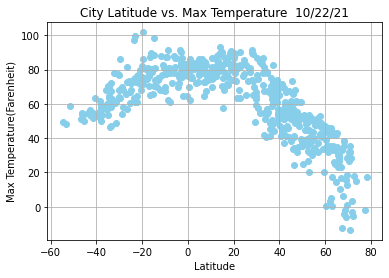

In [106]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o", facecolors="skyblue")

# Incorporate the other graph properties
tgmtime=time.gmtime(clean_city_data["Date"][0])
datecnv=time.strftime("%x",tgmtime)
plt.title(f"City Latitude vs. Max Temperature  {datecnv}")
plt.ylabel("Max Temperature(Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInCities.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

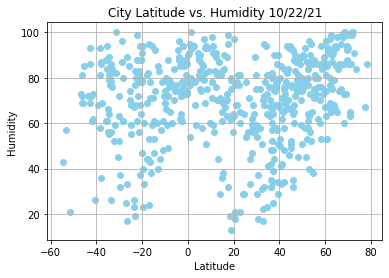

In [107]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolors="skyblue")

# Incorporate the other graph properties
tgmtime=time.gmtime(clean_city_data["Date"][0])
datecnv=time.strftime("%x",tgmtime)
plt.title(f"City Latitude vs. Humidity {datecnv}")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

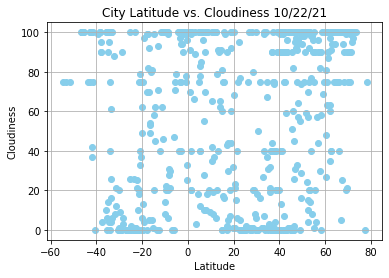

In [108]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolors="skyblue")

# Incorporate the other graph properties
tgmtime=time.gmtime(clean_city_data["Date"][0])
datecnv=time.strftime("%x",tgmtime)
plt.title(f"City Latitude vs. Cloudiness {datecnv}")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

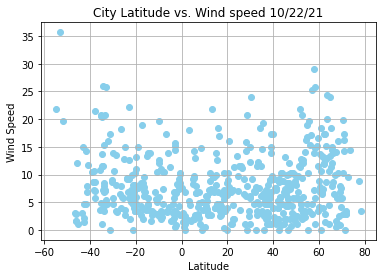

In [109]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["WindSpeed"], marker="o", facecolors="skyblue")

# Incorporate the other graph properties
tgmtime=time.gmtime(clean_city_data["Date"][0])
datecnv=time.strftime("%x",tgmtime)
plt.title(f"City Latitude vs. Wind speed {datecnv}")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInCities.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

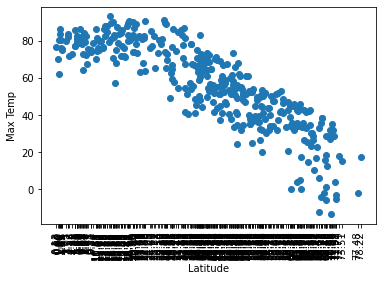

In [110]:
#>=0 latitide
northernh=clean_city_data.loc[clean_city_data["Lat"] >= 0.0]
southernh=clean_city_data.loc[clean_city_data["Lat"] < 0.0]

Latcol = northernh.iloc[:,1]


MaxTempcol = northernh.iloc[:,3]

plt.scatter(Latcol,MaxTempcol)
plt.xticks(Latcol, rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()



The r squared value : -0.8504067291263281
y= -0.96x + 93.66


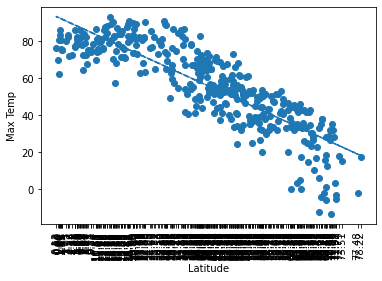

In [111]:
# # Perform a linear regression on Max Temp versus Latitude
# vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, violent_crime_rate)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Latcol, MaxTempcol)


vc_fit = vc_slope * Latcol + vc_int
print(f"The r squared value : {vc_r}")
lineeq="y= "+ str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
print(lineeq)
plt.scatter(Latcol,MaxTempcol)
plt.xticks(Latcol, rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.plot(Latcol,vc_fit,"--")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r squared value : 0.7309837940711948
y= 0.64x + 84.69


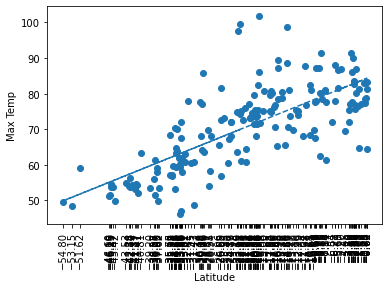

In [112]:
#>=0 latitide
northernh=clean_city_data.loc[clean_city_data["Lat"] >= 0.0]
southernh=clean_city_data.loc[clean_city_data["Lat"] < 0.0]

Latcol = southernh.iloc[:,1]

MaxTempcol = southernh.iloc[:,3]


# # Perform a linear regression on Max Temp versus Latitude


vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Latcol, MaxTempcol)

vc_fit = vc_slope * Latcol + vc_int
print(f"The r squared value : {vc_r}")
lineeq="y= "+ str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
print(lineeq)

plt.scatter(Latcol,MaxTempcol)
plt.xticks(Latcol, rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.plot(Latcol,vc_fit,"--")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared value : 0.17586471795751019
y= 0.17x + 65.11


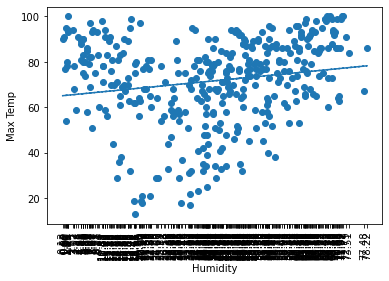

In [113]:

northernh=clean_city_data.loc[clean_city_data["Lat"] >= 0.0]
southernh=clean_city_data.loc[clean_city_data["Lat"] < 0.0]

Latcol = northernh.iloc[:,1]

Humidcol = northernh.iloc[:,4]


# # Perform a linear regression on Max Temp versus Latitude


vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Latcol, Humidcol)

vc_fit = vc_slope * Latcol + vc_int
print(f"The r squared value : {vc_r}")
lineeq="y= "+ str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
print(lineeq)

plt.scatter(Latcol,Humidcol)
plt.xticks(Latcol, rotation=90)
plt.xlabel('Humidity')
plt.ylabel('Max Temp')

plt.plot(Latcol,vc_fit,"--")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r squared value : 0.13799216117962426
y= 0.19x + 73.17


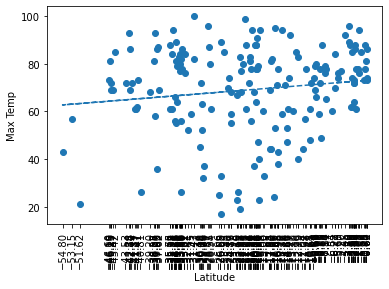

In [114]:
northernh=clean_city_data.loc[clean_city_data["Lat"] >= 0.0]
southernh=clean_city_data.loc[clean_city_data["Lat"] < 0.0]


Latcol = southernh.iloc[:,1]

Humidcol = southernh.iloc[:,4]


# # Perform a linear regression on Max Temp versus Latitude

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Latcol, Humidcol)

vc_fit = vc_slope * Latcol + vc_int
print(f"The r squared value : {vc_r}")
lineeq="y= "+ str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
print(lineeq)

plt.scatter(Latcol,Humidcol)
plt.xticks(Latcol, rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.plot(Latcol,vc_fit,"--")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared value : 0.22212559961464343
y= 0.44x + 39.83


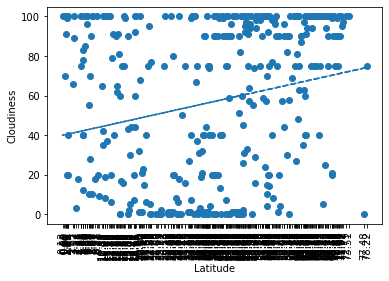

In [115]:
northernh=clean_city_data.loc[clean_city_data["Lat"] >= 0.0]
southernh=clean_city_data.loc[clean_city_data["Lat"] < 0.0]


Latcol = northernh.iloc[:,1]

Cloudcol = northernh.iloc[:,5]


# # Perform a linear regression on Max Temp versus Latitude

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Latcol, Cloudcol)

vc_fit = vc_slope * Latcol + vc_int
print(f"The r squared value : {vc_r}")
lineeq="y= "+ str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
print(lineeq)

plt.scatter(Latcol,Cloudcol)
plt.xticks(Latcol, rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.plot(Latcol,vc_fit,"--")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r squared value : 0.04155902477160526
y= 0.12x + 56.21


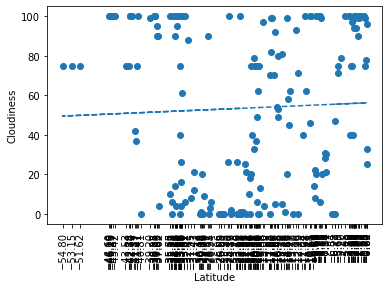

In [116]:
northernh=clean_city_data.loc[clean_city_data["Lat"] >= 0.0]
southernh=clean_city_data.loc[clean_city_data["Lat"] < 0.0]


Latcol = southernh.iloc[:,1]

Cloudcol = southernh.iloc[:,5]


# # Perform a linear regression on Max Temp versus Latitude

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Latcol, Cloudcol)

vc_fit = vc_slope * Latcol + vc_int
print(f"The r squared value : {vc_r}")
lineeq="y= "+ str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
print(lineeq)

plt.scatter(Latcol,Cloudcol)
plt.xticks(Latcol, rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.plot(Latcol,vc_fit,"--")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared value : 0.22835444371004704
y= 0.06x + 5.0


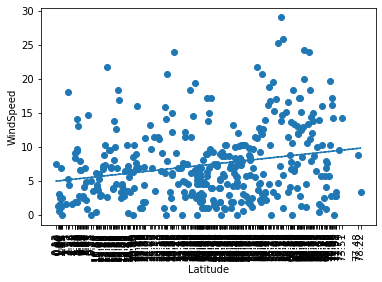

In [117]:
northernh=clean_city_data.loc[clean_city_data["Lat"] >= 0.0]
southernh=clean_city_data.loc[clean_city_data["Lat"] < 0.0]


Latcol = northernh.iloc[:,1]

Windcol = northernh.iloc[:,6]


# # Perform a linear regression on Max Temp versus Latitude

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Latcol, Windcol)

vc_fit = vc_slope * Latcol + vc_int
print(f"The r squared value : {vc_r}")
lineeq="y= "+ str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
print(lineeq)

plt.scatter(Latcol,Windcol)
plt.xticks(Latcol, rotation=90)
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')

plt.plot(Latcol,vc_fit,"--")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r squared value : -0.23954455562829197
y= -0.1x + 5.86


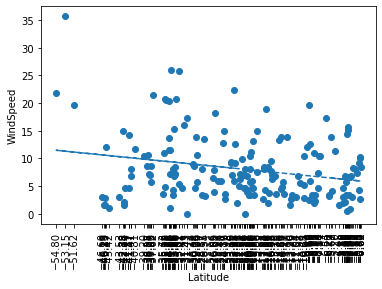

In [118]:
northernh=clean_city_data.loc[clean_city_data["Lat"] >= 0.0]
southernh=clean_city_data.loc[clean_city_data["Lat"] < 0.0]


Latcol = southernh.iloc[:,1]

Windcol = southernh.iloc[:,6]


# # Perform a linear regression on Max Temp versus Latitude

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(Latcol, Windcol)

vc_fit = vc_slope * Latcol + vc_int
print(f"The r squared value : {vc_r}")
lineeq="y= "+ str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
print(lineeq)

plt.scatter(Latcol,Windcol)
plt.xticks(Latcol, rotation=90)
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')

plt.plot(Latcol,vc_fit,"--")
plt.show()

Observations:
Temperature has correlation with the Latitude. As going away from the equator, the temerature decreases.

As moving close to the equator, cloudiness decreases.

Not seeing much correlation between Wind Speed and Latitude.